# 2. Basic GCN classification (PyTorch)

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (27/03/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Imageio
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)
- Torch (tested on v1.10.1)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import imageio

### Dataset

In [2]:
# Adjacency matrix for Zachary graph
adj = np.array([[0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
                [1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
                [1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],
                [1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1],
                [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1],
                [0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1],
                [0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0]])
A = torch.Tensor(adj)

In [3]:
# Labels for all nodes
# (0 is admin, 34 is instructor, all others are -1 because they are currently unlabeled)
current = torch.tensor([0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, \
                       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1])

In [4]:
# Ground truth for reference
ground_truth = torch.tensor([0, 0, 0, 0 ,0 ,0 ,0, 0, 1, 1, 0 ,0, 0, 0, 1 ,1 ,0 ,0, \
                             1, 0, 1, 0 ,1 ,1, 1, 1, 1 ,1 ,1, 1, 1, 1, 1, 1 ])

### GCN with basic graph convolutions, no nodes features

In [5]:
class GCNConv_Layer(nn.Module):
    """
    Standard GCN convolution layer class
    """
    
    def __init__(self, adj, input_channels, output_channels):
        super().__init__()
        self.A_hat = adj + torch.eye(adj.size(0))
        self.D = torch.diag(torch.sum(adj, 1))
        self.D = self.D.inverse()
        self.A_hat = torch.mm(self.D, self.A_hat)
        self.W = nn.Parameter(torch.rand(input_channels, output_channels))
    
    def forward(self, X):
        out = torch.relu(torch.mm(torch.mm(self.A_hat, X), self.W))
        return out

In [6]:
class Net1(torch.nn.Module):
    """
    Standard GCN model class
    """
    
    def __init__(self, adj, num_feat, num_hid, num_out):
        super().__init__()
        self.conv1 = GCNConv_Layer(adj, num_feat, num_hid)
        self.conv2 = GCNConv_Layer(adj, num_hid, num_out)
        
    def forward(self, X):
        X  = self.conv1(X)
        X = self.conv2(X)
        return X

In [7]:
# No relevant features for nodes 
# Using X = identity will make nodes features irrelevant
# and the model will have to learn from adjacency matrix only
X = torch.eye(A.size(0))

In [8]:
model = Net1(A, X.size(0), 10, 2)
criterion = torch.nn.CrossEntropyLoss(ignore_index = -1)
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
loss = criterion(model(X), ground_truth)

In [9]:
history1 = []
for i in range(500):
    # Forward pass
    optimizer.zero_grad()
    loss = criterion(model(X), current)
    
    # Backprop
    loss.backward()
    optimizer.step()
    
    # For display later
    l = (model(X))

    if i%10 == 0:
        history1.append(loss.item())
        print("Cross Entropy Loss (iter = {}): =".format(i), loss.item())

Cross Entropy Loss (iter = 0): = 1.0960849523544312
Cross Entropy Loss (iter = 10): = 0.7083942890167236
Cross Entropy Loss (iter = 20): = 0.7007843255996704
Cross Entropy Loss (iter = 30): = 0.6243546009063721
Cross Entropy Loss (iter = 40): = 0.5890257954597473
Cross Entropy Loss (iter = 50): = 0.5422787666320801
Cross Entropy Loss (iter = 60): = 0.49574512243270874
Cross Entropy Loss (iter = 70): = 0.44367843866348267
Cross Entropy Loss (iter = 80): = 0.38903912901878357
Cross Entropy Loss (iter = 90): = 0.33374303579330444
Cross Entropy Loss (iter = 100): = 0.2809663712978363
Cross Entropy Loss (iter = 110): = 0.23334994912147522
Cross Entropy Loss (iter = 120): = 0.1925956904888153
Cross Entropy Loss (iter = 130): = 0.15953367948532104
Cross Entropy Loss (iter = 140): = 0.1331499218940735
Cross Entropy Loss (iter = 150): = 0.11227944493293762
Cross Entropy Loss (iter = 160): = 0.095882847905159
Cross Entropy Loss (iter = 170): = 0.08284543454647064
Cross Entropy Loss (iter = 180):

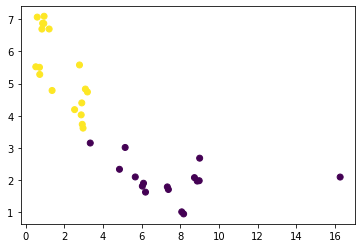

In [10]:
plt.scatter(l.detach().numpy()[:,0], l.detach().numpy()[:,1], \
            c = ground_truth)

### GCN with Kipf graph convolutions, no nodes features

In [11]:
class GCNKipf_Layer(nn.Module):
    """
    Kipf GCN convolution layer class
    """
    
    def __init__(self, adj, input_channels, output_channels):
        super().__init__()
        self.A_hat = adj + torch.eye(adj.size(0))
        self.D = torch.diag(torch.sum(adj, 1))
        self.D = self.D.inverse().sqrt()
        self.A_hat = torch.mm(torch.mm(self.D, self.A_hat), self.D)
        self.W = nn.Parameter(torch.rand(input_channels, output_channels))
    
    def forward(self, X):
        out = torch.relu(torch.mm(torch.mm(self.A_hat, X), self.W))
        return out

In [12]:
class Net2(torch.nn.Module):
    """
    Standard GCN model class
    """
    
    def __init__(self, adj, num_feat, num_hid, num_out):
        super().__init__()
        self.conv1 = GCNKipf_Layer(adj, num_feat, num_hid)
        self.conv2 = GCNKipf_Layer(adj, num_hid, num_out)
        
    def forward(self, X):
        X  = self.conv1(X)
        X = self.conv2(X)
        return X

In [13]:
# No relevant features for nodes 
# Using X = identity will make nodes features irrelevant
# and the model will have to learn from adjacency matrix only
X = torch.eye(A.size(0))

In [14]:
model2 = Net1(A, X.size(0), 10, 2)
criterion = torch.nn.CrossEntropyLoss(ignore_index = -1)
optimizer = optim.SGD(model2.parameters(), lr = 0.01, momentum = 0.9)
loss = criterion(model2(X), ground_truth)

In [15]:
history2 = []
for i in range(500):
    # Forward pass
    optimizer.zero_grad()
    loss = criterion(model2(X), current)
    
    # Backprop
    loss.backward()
    optimizer.step()
    
    # For display later
    l = (model2(X))

    if i%10 == 0:
        history2.append(loss.item())
        print("Cross Entropy Loss (iter = {}): =".format(i), loss.item())

Cross Entropy Loss (iter = 0): = 0.7158387899398804
Cross Entropy Loss (iter = 10): = 0.6941231489181519
Cross Entropy Loss (iter = 20): = 0.6553307771682739
Cross Entropy Loss (iter = 30): = 0.6119217872619629
Cross Entropy Loss (iter = 40): = 0.5661046504974365
Cross Entropy Loss (iter = 50): = 0.5170614719390869
Cross Entropy Loss (iter = 60): = 0.4643201231956482
Cross Entropy Loss (iter = 70): = 0.40893375873565674
Cross Entropy Loss (iter = 80): = 0.3527054190635681
Cross Entropy Loss (iter = 90): = 0.29891103506088257
Cross Entropy Loss (iter = 100): = 0.2498018741607666
Cross Entropy Loss (iter = 110): = 0.20729894936084747
Cross Entropy Loss (iter = 120): = 0.17220862209796906
Cross Entropy Loss (iter = 130): = 0.1436990201473236
Cross Entropy Loss (iter = 140): = 0.12090829014778137
Cross Entropy Loss (iter = 150): = 0.10286784917116165
Cross Entropy Loss (iter = 160): = 0.08854615688323975
Cross Entropy Loss (iter = 170): = 0.07714404910802841
Cross Entropy Loss (iter = 180)

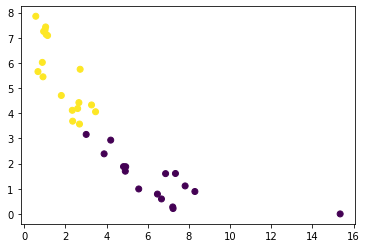

In [16]:
plt.scatter(l.detach().numpy()[:,0], l.detach().numpy()[:,1], \
            c = ground_truth)

### GCN with Kipf graph convolutions, adding hop-distance to admin/instructor as nodes features

In [17]:
def bfs(adj, start, goal):
    """
    Gives hop-distance between node start and node goal
    for given adjacency matrix.
    Returns zero if start = goal
    or goal not reachable from start.
    """
    
    if start == goal:
        return float(0)
    queue = [start]
    visited = []
    dist = float(0)
    
    while(len(queue) > 0):
        dist += 1
        temp = []
        for q in queue:
            neighbours_node = np.argwhere(adj[q]).reshape(1, -1)[0]
            if goal in neighbours_node:
                return dist
            else:
                for n in neighbours_node:
                    not_visited = (n not in visited)
                    not_queue = (n not in queue)
                    not_temp = (n not in temp)
                    if not_visited and not_queue and not_temp:
                        temp.append(n)
        visited.extend(queue)
        queue = temp
    return float(-1)

In [18]:
y = bfs(adj, 1, 33)
print(y)

1.0


In [19]:
# Adding relevant features (hop distance to nodes admin and instructor)
node_features = np.array([[bfs(adj, i, 0), bfs(adj, i, 33)] for i in range(34)])
X2 = torch.from_numpy(node_features).float()
print(X2)

tensor([[0., 2.],
        [1., 2.],
        [1., 2.],
        [1., 2.],
        [1., 3.],
        [1., 3.],
        [1., 3.],
        [1., 3.],
        [1., 1.],
        [2., 1.],
        [1., 3.],
        [1., 3.],
        [1., 3.],
        [1., 1.],
        [3., 1.],
        [3., 1.],
        [2., 4.],
        [1., 3.],
        [3., 1.],
        [1., 1.],
        [3., 1.],
        [1., 3.],
        [3., 1.],
        [3., 1.],
        [2., 2.],
        [2., 2.],
        [3., 1.],
        [2., 1.],
        [2., 1.],
        [3., 1.],
        [2., 1.],
        [1., 1.],
        [2., 1.],
        [2., 0.]])


In [20]:
model3 = Net2(A, X2.size(1), 10, 2)
criterion = torch.nn.CrossEntropyLoss(ignore_index = -1)
optimizer = optim.SGD(model3.parameters(), lr = 0.01, momentum = 0.9)
loss = criterion(model3(X2), ground_truth)

In [21]:
history3 = []
for i in range(500):
    # Forward pass
    optimizer.zero_grad()
    loss = criterion(model3(X2), current)
    
    # Backprop
    loss.backward()
    optimizer.step()
    
    # For display later
    l = (model3(X2))

    if i%10 == 0:
        history3.append(loss.item())
        print("Cross Entropy Loss (iter = {}): =".format(i), loss.item())

Cross Entropy Loss (iter = 0): = 2.3493735790252686
Cross Entropy Loss (iter = 10): = 0.7784635424613953
Cross Entropy Loss (iter = 20): = 0.1477077156305313
Cross Entropy Loss (iter = 30): = 0.06329482793807983
Cross Entropy Loss (iter = 40): = 0.016719123348593712
Cross Entropy Loss (iter = 50): = 0.012326930649578571
Cross Entropy Loss (iter = 60): = 0.008480057120323181
Cross Entropy Loss (iter = 70): = 0.006702052429318428
Cross Entropy Loss (iter = 80): = 0.005850758403539658
Cross Entropy Loss (iter = 90): = 0.005280332639813423
Cross Entropy Loss (iter = 100): = 0.004821693524718285
Cross Entropy Loss (iter = 110): = 0.004437165334820747
Cross Entropy Loss (iter = 120): = 0.004109819419682026
Cross Entropy Loss (iter = 130): = 0.003827064298093319
Cross Entropy Loss (iter = 140): = 0.0035795592702925205
Cross Entropy Loss (iter = 150): = 0.0033609196543693542
Cross Entropy Loss (iter = 160): = 0.003166590817272663
Cross Entropy Loss (iter = 170): = 0.0029924288392066956
Cross E

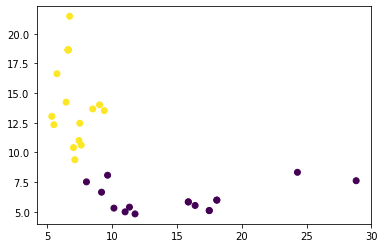

In [22]:
plt.scatter(l.detach().numpy()[:,0], l.detach().numpy()[:,1], \
            c = ground_truth)

### Loss comparison

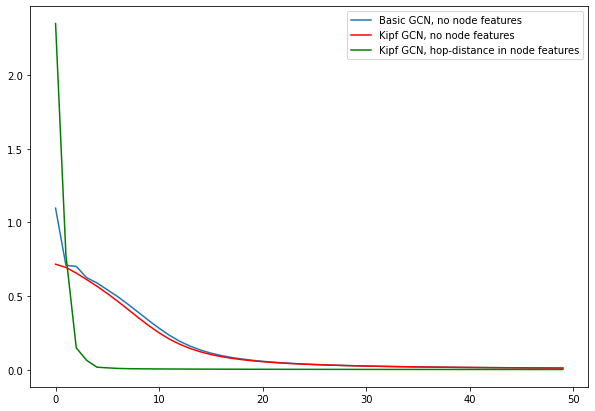

In [23]:
plt.figure(figsize = (10, 7))
plt.plot(history1, label = 'Basic GCN, no node features')
plt.plot(history2, color = 'red', label = 'Kipf GCN, no node features')
plt.plot(history3, color = 'green', label = 'Kipf GCN, hop-distance in node features')
plt.legend(loc = 'best')